In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# ABC Multistate Bank Customer Churn Prediction 🏦

Welcome to the world of ABC Multistate Bank's data! This dataset presents a treasure trove of information about the bank's customers and their interactions. Our mission? To predict customer churn, the phenomenon where a client bids adieu to the bank during a specific period.



In [2]:
path = './Bank Customer Churn Prediction.csv'
churn_df = pd.read_csv(path)

## A Guided EDA Process 🚀🔍

Exploratory Data Analysis (EDA) is an essential step in any data science project, helping us understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

## Understand Column Meanings 📊

In [3]:
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataset Description 📗

Here is a more detailed explanation of each feature:

- **customer_id**: A unique identifier (currently sitting on the sidelines).
- **credit_score**: A numerical assessment, telling us about the customer's creditworthiness.
- **country**: Where in the world the customer hails from.
- **gender**: The gender of our esteemed clients.
- **age**: Age, a number that never grows old in data analysis.
- **tenure**: The duration of their relationship with the bank in years.
- **balance**: The state of their financial affairs in €.
- **products_number**: How many bank products they've embraced.
- **credit_card**: Do they wield the power of plastic?
- **active_member**: Are they actively engaging with the bank?
- **estimated_salary**: An estimate of their annual salary.
- **churn**: Our target variable. It's 1 if they've bid us farewell, 0 if they're staying by our side.



## Check Data Integrity 🔍

In [4]:
# Check for missing values
missing_values = churn_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


We are good to go! No missing values.

## Visualize Distributions 📈

<Axes: xlabel='churn', ylabel='Count'>

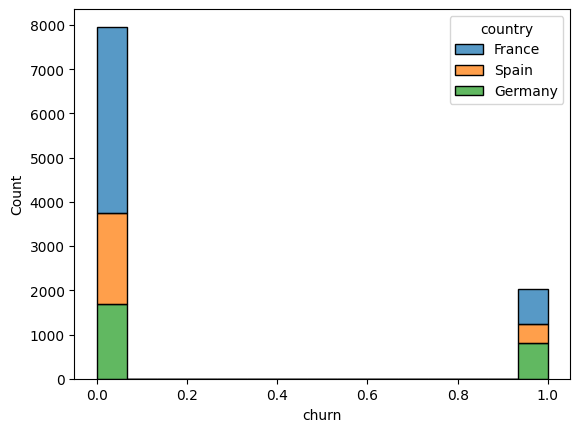

In [13]:
# Select the column you want to analyze
column_to_analyze = 'churn'

sns.histplot(churn_df, x = column_to_analyze, hue='country', multiple = 'stack')

## Pair Plots for Relationships 🔄

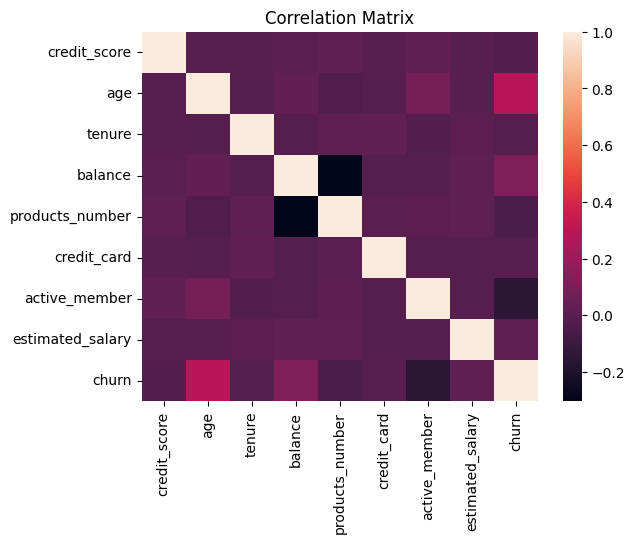

In [14]:
fig, ax = plt.subplots()

corr_df = churn_df.drop('customer_id', axis=1).corr(numeric_only=True)

ax = sns.heatmap(corr_df)
ax.set_title('Correlation Matrix')

fig.show()

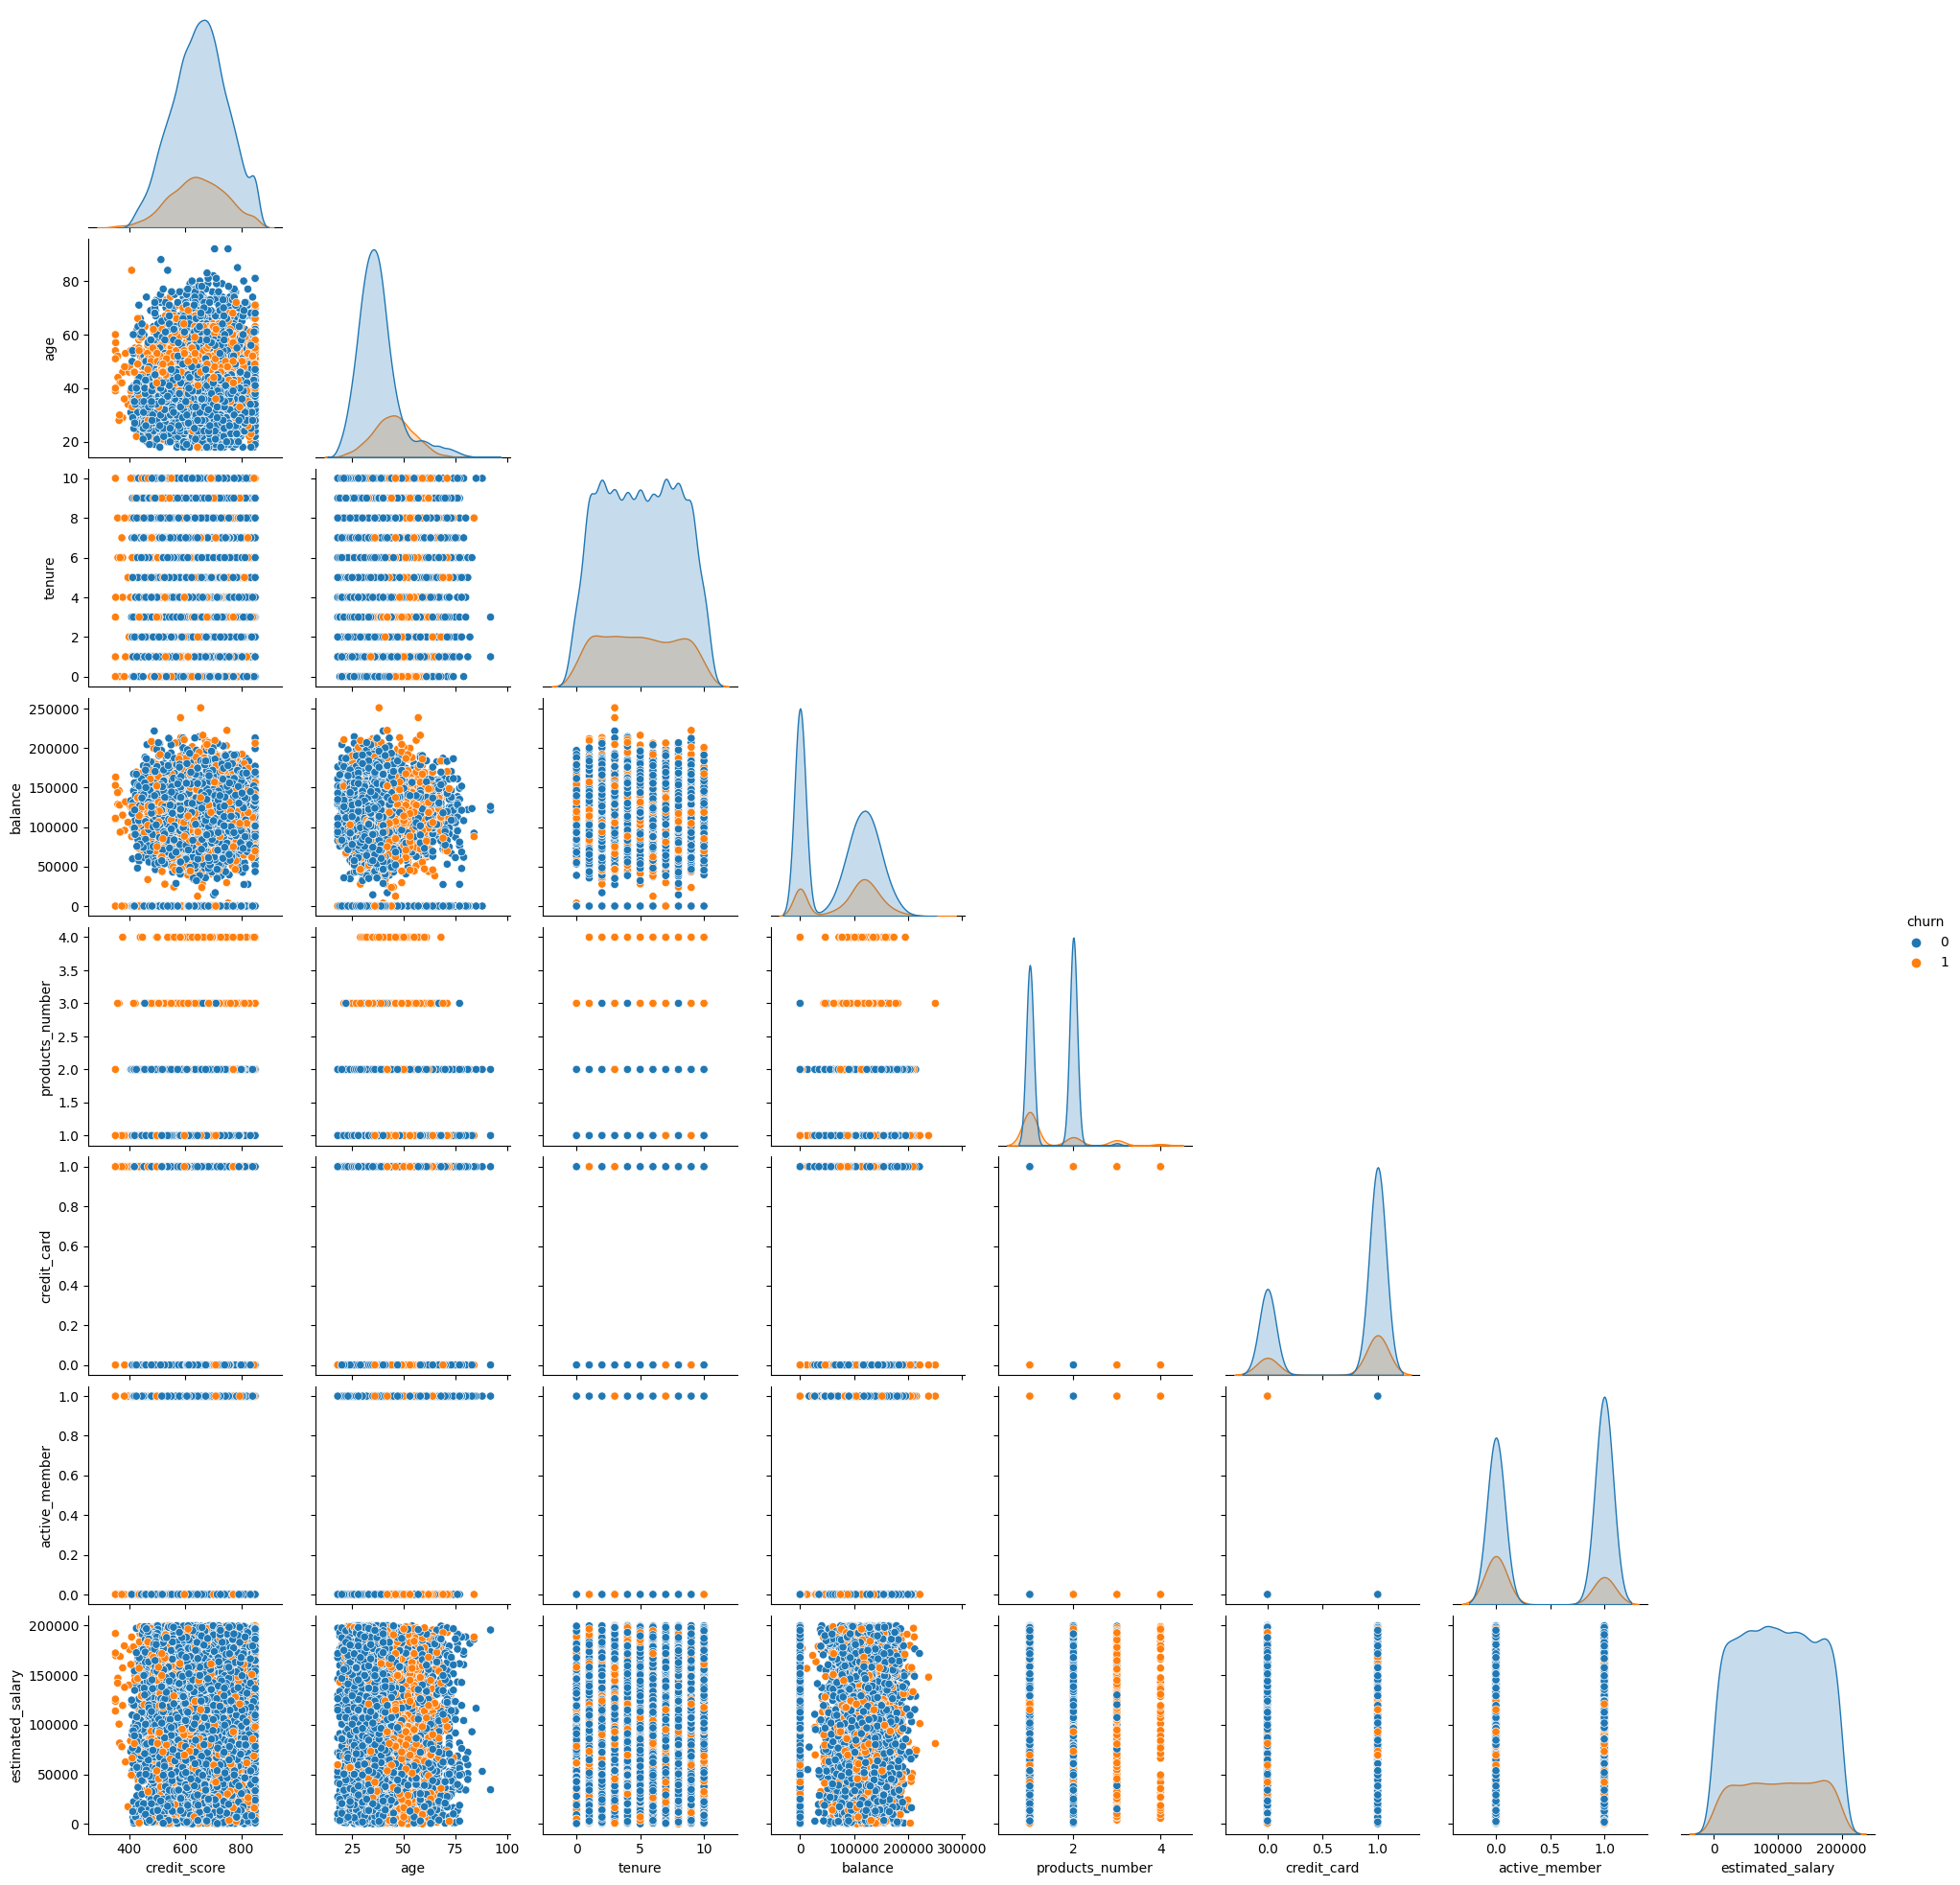

In [18]:
sns.pairplot(churn_df.drop('customer_id', axis=1), hue='churn', corner=True)

# Preprocessing ⚙️

Preprocessing is the process of preparing raw data for machine learning. It is an essential step in any machine learning project, as it can help to improve the performance and accuracy of your model.

The goal of preprocessing is to transform the raw data into a format that is more suitable for machine learning algorithms. This may involve cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.

## Splitting the Dataset into Train and Test Set 🔪

Splitting the dataset into a train and test set is an important step in machine learning. The train set is used to train the model, and the test set is used to evaluate the performance of the trained model on unseen data.

This is important because it helps to prevent overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data.

A common split ratio is 80/20, meaning that 80% of the data is used for the train set and 20% of the data is used for the test set.

Here is an example of how to split the dataset into a train and test set using scikit-learn:



In [20]:
from sklearn.model_selection import train_test_split

X = churn_df.drop('churn', axis=1)
y = churn_df['churn']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (8000, 11), y_train shape: (8000,)
X_test shape: (2000, 11), y_test shape: (2000,)


## Distribution of Target Variable Across Different Sets 📊

In our quest to create a robust model, it's crucial to ensure that the distribution of the target variable is harmonious across multiple sets. We want to maintain balance and equilibrium among the original dataset, the training set, and the test set to steer our model in the right direction! 🚀💼

Let's dive in and make sure everything's in perfect alignment. 🌟📈






In [21]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")


Distribution of y (Original Dataset):
Class 0: 7963 samples
Class 1: 2037 samples
Ratio: 0.2037

Distribution of y_train (Training Set):
Class 0: 6356 samples
Class 1: 1644 samples
Ratio: 0.2055

Distribution of y_test (Test Set):
Class 0: 1607 samples
Class 1: 393 samples
Ratio: 0.1965


We have to make sure that the distribution of the target classes are respected among the dataset.
For this reason, we introduce...

## Stratification: Splitting the Dataset with Distribution Consideration 🧩

In machine learning, it's essential to maintain a balanced distribution of the target variable when splitting the dataset into training and testing sets. This helps ensure that the model is properly trained and evaluated across all classes. To achieve this, we'll perform a **stratified** split, where the proportions of each class in the original dataset are preserved in both the training and testing sets.

Let's proceed to split the dataset while respecting the distributions.


In [22]:
from sklearn.model_selection import train_test_split

# Perform a stratified split to maintain target variable distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Shapes of the split datasets:
X_train shape: (8000, 11), y_train shape: (8000,)
X_test shape: (2000, 11), y_test shape: (2000,)


In [23]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")


Distribution of y (Original Dataset):
Class 0: 7963 samples
Class 1: 2037 samples
Ratio: 0.2037

Distribution of y_train (Training Set):
Class 0: 6370 samples
Class 1: 1630 samples
Ratio: 0.20375

Distribution of y_test (Test Set):
Class 0: 1593 samples
Class 1: 407 samples
Ratio: 0.2035


## Putting all together 🤲

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the categorical variables
churn_df_dummies = pd.get_dummies(churn_df, columns=['country', 'gender'])

X = churn_df_dummies.drop('churn', axis=1)
y = churn_df_dummies['churn']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

... Carefull here! Make sure that you use the right variable for the fit of the scaler (i.e. `X_train`).

Also, you may want to exclude categorical variable from the scaling.